# INFOMDSS Team Project Examples

This Docker container may serve as a starting point for your course project.
It includes a set of simple instructions to:
<br>
 -> load a dataset (locally)
 <br>
 -> into a database
 <br>
 -> and be able to query data from the database
 <br>
 -> and make simple visualizations on the queried data

In [2]:
# Imports

from sqlalchemy import create_engine, text, inspect, Table
import pandas as pd

## Load csv file

Load the file called world_population.csv into a pandas dataframe. Make sure you parse the columns correctly.

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory (directory above the current directory)
parent_directory = os.path.dirname(current_directory)

# List all folders in the parent directory
folders_in_parent_directory = [folder for folder in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, folder))]

# Print the list of folders
print("Folders in the parent directory:")
for folder in folders_in_parent_directory:
    print(folder)


Folders in the parent directory:
.git
dashboard
data
notebook


##### Agricultural Production Data Import

Cereals and Vegetables can be updated to range 2013 - 2022, 2023 is still mostly incomplete <br>
<br>
Cereals:    2014 - 2023, Harvested Production, Thousand tonnes <br>
Vegetables: 2014 - 2023, Harvested Production, Thousand tonnes <br>
Dairy:      2013 - 2022, Raw milk obtained, Thousand tonnes <br>
Beef:       2013 - 2022, Slaughterings, Thousand tonnes <br>
Mutton:     2013 - 2022, Slaughterings, Thousand tonnes <br>
Pork:       2013 - 2022, Slaughterings, Thousand tonnes <br>
Poultry:    2013 - 2022, Slaughterings, Thousand tonnes <br>


In [52]:
#Imports under each columns uses same structure
#Data sets for cereals and vegetables
agri_prod_cereals = pd.read_excel("../data/agri_production/cereals.xlsx", "Sheet 1", header=8, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[9, 10, 11, 12], skipfooter=7, na_values=":")
agri_prod_vegetables = pd.read_excel("../data/agri_production/vegetables.xlsx", "Sheet 1", header=8, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[9, 10, 11, 12], skipfooter=7, na_values=":")
#Data set for dairy
agri_prod_dairy = pd.read_excel("../data/agri_production/dairy.xlsx", "Sheet 1", header=8, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[9, 10, 11, 12], skipfooter=9, na_values=":")
#Data sets for meat production
agri_prod_beef = pd.read_excel("../data/agri_production/beef.xlsx", "Sheet 1", header=9, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[10, 11, 12, 13, 14, 15], skipfooter=7, na_values=":")
agri_prod_mutton = pd.read_excel("../data/agri_production/mutton.xlsx", "Sheet 1", header=9, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[10, 11, 12, 13, 14, 15], skipfooter=7, na_values=":")
agri_prod_pork = pd.read_excel("../data/agri_production/pork.xlsx", "Sheet 1", header=9, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[10, 11, 12, 13, 14, 15], skipfooter=7, na_values=":")
#Data set for poultry production
agri_prod_poultry = pd.read_excel("../data/agri_production/poultry.xlsx", "Sheet 1", header=9, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[10, 11, 12, 13, 14, 15], skipfooter=9, na_values=":")


#print(agri_prod_poultry)

c:\Users\Janus\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


##### Agricultural Area Data Import

Data is only for 2020

In [51]:
agri_area_general = pd.read_excel("../data/agri_area/general_area_2020.xlsx", "Sheet 1", header=11, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T,V", skiprows=[12], skipfooter=5, na_values=":")

print(agri_area_general)

                 Farm area  Utilised agricultural area  \
CROPS (Labels)                                           
Belgium            36000.0                     36000.0   
Bulgaria          132740.0                    132740.0   
Czechia            28910.0                     28910.0   
Denmark            37090.0                     37090.0   
Germany           262780.0                    262780.0   
Estonia            11370.0                     11370.0   
Ireland           130220.0                    130220.0   
Greece            530750.0                    530750.0   
Spain             914870.0                    914870.0   
France            393030.0                    393030.0   
Croatia           143930.0                    143930.0   
Italy            1133020.0                   1133020.0   
Cyprus             34050.0                     34050.0   
Latvia             68980.0                     68980.0   
Lithuania         132080.0                    132080.0   
Luxembourg    

c:\Users\Janus\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


##### Agricultural Nutrients Data Import

Nitrogen:   2010 - 2019, Gross Balance Per Hectare <br>
Phospohrus: 2010 - 2019, Gross Balance Per Hectare

In [54]:
agri_nut_nitrogen = pd.read_excel("../data/agri_nutrients/nitrogen_per_hectare.xlsx", "Sheet 1", header=8, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[9], skipfooter=5, na_values=":")
agri_nut_phosphorus = pd.read_excel("../data/agri_nutrients/phosphorus_per_hectare.xlsx", "Sheet 1", header=8, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[9], skipfooter=5, na_values=":")

print(agri_nut_phosphorus)

                                           2010  2011  2012  2013  2014  2015  \
TIME                                                                            
European Union - 27 countries (from 2020)   1.8   1.4   1.6   1.5   0.8   NaN   
Belgium                                     5.0   5.0   6.0   6.0   5.0   5.0   
Bulgaria                                   -5.0  -6.0  -4.0  -9.0  -6.0  -6.0   
Czechia                                    -2.1  -3.3  -1.3  -2.7  -3.9  -1.3   
Denmark                                     8.0   7.0   7.0   8.0   7.0   7.0   
Germany                                    -1.4  -0.4  -2.6  -1.0  -3.7  -2.0   
Estonia                                    -5.7  -4.5  -6.2   NaN   NaN   NaN   
Ireland                                    17.9  17.5  18.1  20.5  20.5  20.9   
Greece                                      2.0  -1.0  -1.0   2.0   0.0   0.0   
Spain                                       3.2   2.4   4.5   2.9   3.8   3.9   
France                      

c:\Users\Janus\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


##### Agricultural Greenhouse Emissions Data Import

Greenhouse Emssions:  2012 - 2021, Thousand Tonnes

In [55]:
agri_greenhouse_emissions = pd.read_excel("../data/agri_emissions/greenhouse.xlsx", "Sheet 1", header=9, index_col=0, usecols="A,B,D,F,H,J,L,N,P,R,T", skiprows=[10, 11], skipfooter=3, na_values=":")

print(agri_greenhouse_emissions)

                 2012      2013      2014      2015      2016      2017  \
TIME                                                                      
Belgium       9579.49   9579.71   9708.20   9715.18   9601.71   9653.14   
Bulgaria      4985.00   5432.20   5852.05   5890.94   6198.09   6165.52   
Czechia       7572.90   7484.56   7559.94   8164.50   8405.22   8191.44   
Denmark      12061.25  12056.28  12192.66  12029.43  12235.95  12282.34   
Germany      60052.38  60852.00  62107.72  61967.23  61546.13  60866.86   
Estonia       1409.72   1451.60   1498.19   1459.91   1426.11   1478.63   
Ireland      19706.42  20504.14  20056.24  20620.34  21161.49  21897.67   
Greece        8839.48   8754.65   8347.14   8165.96   8157.39   8189.34   
Spain        31623.81  31338.11  32621.16  33236.25  33305.31  34084.83   
France       71600.63  70853.05  72410.57  72143.08  71453.49  71482.86   
Croatia       3061.41   2800.88   2736.18   2787.20   2745.03   2843.99   
Italy        33199.96  32

c:\Users\Janus\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Store data into database
Save the contents in the world_population file to the a table called population in the database. 

In [4]:
# Create a SQLAlchemy engine to connect to the PostgreSQL database
engine = create_engine("postgresql://student:infomdss@db_dashboard:5432/dashboard")

# Establish a connection to the database using the engine
# The 'with' statement ensures that the connection is properly closed when done
with engine.connect() as conn:
    # Execute an SQL command to drop the 'population' table if it exists
    # The text() function allows you to execute raw SQL statements
    result = conn.execute(text("DROP TABLE IF EXISTS population CASCADE;"))

# Assuming you have a DataFrame named 'world_population_df', the following line
# writes the data from the DataFrame to a new 'population' table in the database
# If the 'population' table already exists, it will be replaced with the new data
# This prints the number of rows entered in the database table
world_population_df.to_sql("population", engine, if_exists="replace", index=True)

143

## Fetch data from database
Read the table **population** from the database in a dataframe. Make sure the index column is the index of the dataframe.

In [5]:
# Read data from the SQL table named 'population' using pandas
# 'pd.read_sql_table' is a pandas function that reads data from an SQL table
# 'db_conn' is the database connection object previously established
population_table = pd.read_sql_table('population', engine, index_col='index')

# This line prints the entire DataFrame to the output
print(population_table)

# Note that we transformed the data from a .csv file to a pandas dataframe
# Then loaded the dataframe into the database table
# And now we have pulled the data from the database and put it in a dataframe again
# This is an example of how you might store and fetch data to and from your database for your dashboard

            Region          Type  Year  TotalPopulation YearIncrease
index                                                               
0            WORLD         World  1950          2477675         0,00
1            WORLD         World  1951          2520970         1,75
2            WORLD         World  1952          2565291         1,76
3            WORLD         World  1953          2615251         1,95
4            WORLD         World  1954          2665307         1,91
...            ...           ...   ...              ...          ...
138    Netherlands  Country/Area  2016            17082         0,48
139    Netherlands  Country/Area  2017            17167         0,50
140    Netherlands  Country/Area  2018            17248         0,47
141    Netherlands  Country/Area  2019            17324         0,44
142    Netherlands  Country/Area  2020            17402         0,45

[143 rows x 5 columns]


## Plot data
We can meaningfully plot the data from the database in many different ways to give users of the dashboard a visual impression of the data. 
<br>
For the example data on the world population, we plot a line chart as an example. 

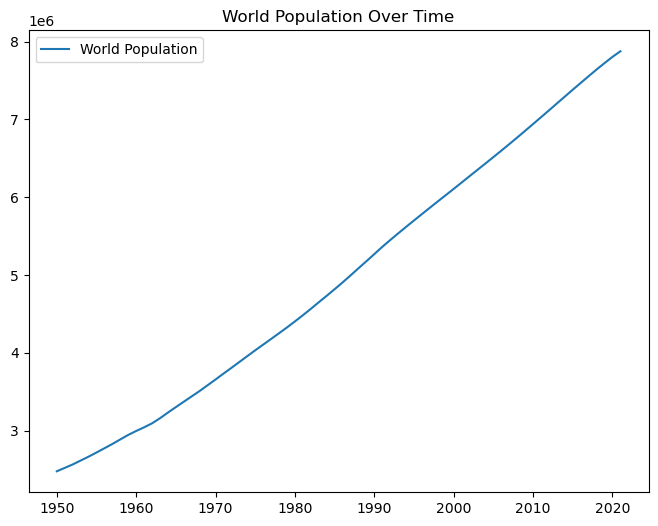

In [6]:
import matplotlib.pyplot as plt

# The data is not yet ready to plot charts with and thus needs to be processed first.
# Convert 'Total Population' to numeric (remove the whitespaces and convert to an integer)
population_table['TotalPopulation'] = population_table['TotalPopulation'].astype(int)

# Filter data for 'WORLD' as for this chart we are only interested in the total world population
world_data = population_table[population_table['Region'] == 'WORLD']

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(world_data['Year'], world_data['TotalPopulation'], label='World Population')  # Add label for the legend

# Add a legend
ax.legend()

# Add a plot title
ax.set_title('World Population Over Time')

plt.show()  # Show the plot
